# Getting started with Ames housing dataset on Google Colab

## Some useful short-cuts
Comment out code (win): CTRL + /

Comment out code (OSX): CMD + /

Execute cell (win/OSX): SHFT + Enter

## Import libraries

In [30]:
# Main libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library to connect Colab with Google Drive.
# from google.colab import drive

## Mount Google Drive to Colab

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Spell Checker for Python

[stackoverflow](https://stackoverflow.com/questions/13928155/spell-checker-for-python)




## Load 'Ames Housing' Data - demonstrating three different ways

1 - Click on the 'AmesHousing.csv' file in the ['ames-housing'](https://github.com/jads-nl/discover-projects/tree/main/ames-housing) repo on GitHub. Click on the **Raw** button. Copy the link in the URL bar. Paste the link in the Pandas function 'read_csv()': 


In [5]:
df_original = pd.read_csv('https://raw.githubusercontent.com/jads-nl/discover-projects/main/ames-housing/AmesHousing.csv')

2 - Right click on the 'AmesHousing.csv' file in the ['ames-housing'](https://github.com/jads-nl/discover-projects/tree/main/ames-housing) repo on GitHub, and copy link to the file. Paste the link in the Pandas function 'read_csv' and add '?raw=True': 


In [6]:
df_original = pd.read_csv('https://github.com/jads-nl/discover-projects/blob/main/ames-housing/AmesHousing.csv'+'?raw=True')

3 - In case the csv file is located on your Google Drive and you have mounted your GoogleDrive to Colab, add a link to the concerned file in the Pandas function 'read_csv'. Of course, in your case the csv file will most likely have a different path:

In [38]:
#df_original = pd.read_csv('drive/MyDrive/Colab Notebooks/2021 05 - Foundation II/AmesHousing.csv')

Make copy of original data, so you have the original data for reference later if needed.

In [7]:
df = df_original.copy()

## Few basic functions to check the data

In [13]:
# Show dimensions of the data frame.
df.shape

(2930, 82)

In [14]:
# Show key information of each of the columns in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [15]:
# Show statistics of numerical data:
df.describe(include="number")

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [16]:
df.describe(include="object")

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2930,2930,198,2930,2930,2930,2930,2930,2930,2930,...,2773,2771,2771,2771,2930,13,572,106,2930,2930
unique,7,2,2,4,4,3,5,3,28,9,...,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2273,2918,120,1859,2633,2927,2140,2789,443,2522,...,1731,1231,2615,2665,2652,4,330,95,2536,2413


<Figure size 2800x1000 with 0 Axes>

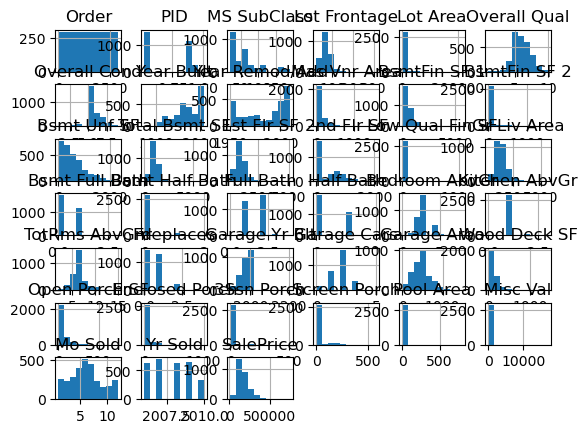

In [17]:
# Set default figure size.
plt.figure(figsize=(28,10))

# Show histogram
df.hist();

## Show columns with missing data

In [ ]:
# Number of missing values for each column:
v_total_missing   = df.isnull().sum()

# Percentage out of total elements in each column (= df.shape[0]):
v_percent_missing = round(
    
    v_total_missing / df.shape[0] * 100,
                          
    ndigits = 1)

# Type of data for each column:
v_missing_type    = df.dtypes

# Create data frame showing statistics per column:
df_missing_data   = pd.DataFrame(
    
    {'type': v_missing_type,
     'total': v_total_missing,
     'percent': v_percent_missing})

# Sort data frame by 'total' (descending order):
df_missing_data   = df_missing_data.sort_values(by='total', ascending = False)

# Show first n columns with highest number of missing data:
df_missing_data.head(n=20)

### Replace empty cells (NA) by other value.
Suppose we want to apply a different strategy to number and object data.

In [22]:
# Let's first split the data frame in two data frames:

# Numbers:
df_number = df.select_dtypes(include = "number")

# Objects:
df_object = df.select_dtypes(exclude = "number")

# Show that the two data frames together contains as many columns as df:
print(
    df_number.shape[1],
    df_object.shape[1],
    df_number.shape[1] + df_object.shape[1],
    df.shape[1])

39 43 82 82


### Replace NA's in number data by median
We demonstrate two different approaches. The 'replace()' function replaces a value of choice by another value of choice. Where, the function 'fillna()' assumes we want to replace NA by another value of choice.

In [23]:
#df_number_imputed = df_number.replace(np.nan, df_number.median())
df_number_imputed = df_number.fillna(df_number.median())

# Show that imputed data no longer contains NA:
print(
    df_number.isna().sum().sum(),
    df_number_imputed.isna().sum().sum())        

682 0


### Replace NA's in object data by "100"

In [25]:
#df_object_imputed = df_object.replace(np.nan, "100")
df_object_imputed = df_object.fillna("100")

# Show that imputed data no longer contains NA:
print(
    df_object.isna().sum().sum(),
    df_object_imputed.isna().sum().sum())   

15067 0


In [26]:
# Put the two imputed data frames together again:
df_imputed = pd.concat([df_number_imputed, df_object_imputed], axis = 1)

print(
    df_imputed.shape,
    df.shape)

(2930, 82) (2930, 82)
